In [1]:
import seaborn as sns
import matplotlib.transforms as transforms
from datetime import datetime
from skimage.io import imsave
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
#%plt.style.use("v_paper")
import pandas as pd
from scipy.io import loadmat
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import re
from statsmodels.stats.anova import anova_lm
import os
import os.path
import statsmodels.api as smapi
import sys
import warnings
from sklearn.linear_model import LinearRegression
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import seaborn as sns
import statsmodels as sm
import scipy
from pathlib import Path
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms


In [2]:
#Regionsdf=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Regionsdf.pkl")
#Compdf=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Compdf.pkl")
Regionsdf=pd.read_pickle("Regionsdf.pkl")
Compdf=pd.read_pickle("Compdf.pkl")

In [ ]:
result = smf.ols(formula="R2 ~ Behavior+RegionNames+GAL4+UAS+WalkSubstrate", data=dfWGF.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')).fit()

aov_table = anova_lm(result, typ=2)

<AxesSubplot:xlabel='UAS', ylabel='CoefWalk'>

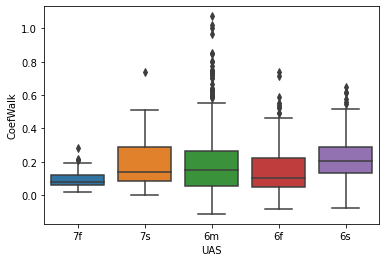

In [6]:
sns.boxplot(x='UAS',y='CoefWalk',data=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"'))

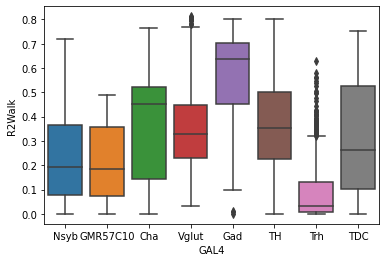

In [4]:
b = sns.boxplot(x='GAL4',y='R2Walk',data=Regionsdf)

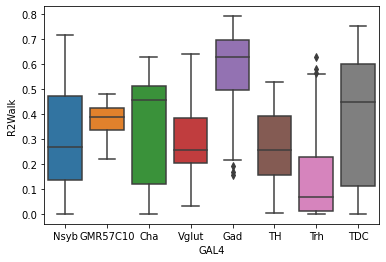

In [5]:
b = sns.boxplot(x='GAL4',y='R2Walk',data=Regionsdf[Regionsdf['FR']<10])

In [13]:
Gaddf.query('R2Walk>0')['WalkSubstrate'].unique()

array(['Styr'], dtype=object)

In [24]:
Pandf.query('R2Walk>0')['FlyID'].unique()

array([ 4,  9, 10, 13, 15, 20, 24, 25, 26, 27], dtype=int64)

In [25]:
Gaddf.query('R2Walk>0')['FlyID'].unique()

array([61, 62, 63, 65, 66], dtype=int64)

In [23]:
Pandf=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
Pandf=Pandf[Pandf['WalkSubstrate']=="Styr"]
Pandf2=Pandf[Pandf['FR']<=20]
Gaddf=Regionsdf.query('GAL4=="Gad"')
Gaddf2=Gaddf[Gaddf['FR']<=20]
print("{0:0.10f}".format(scipy.stats.mannwhitneyu(Pandf.query('R2Walk>0').groupby('FlyID').mean()['R2Walk'],Gaddf2.query('R2Walk>0').groupby('FlyID').mean()['R2Walk']).pvalue))
print("{0:0.10f}".format(scipy.stats.mannwhitneyu(Pandf.query('R2Walk>0').groupby('FlyID').mean()['R2Walk'],Gaddf2.query('R2Walk>0').groupby('FlyID').mean()['R2Walk']).statistic))


0.0026640027
2.0000000000


In [4]:
dfonoff=Compdf.assign(R2=Compdf['R2Walkbin']).assign(BehaviorW='Walk').assign(Coef=Compdf['CoefWalkbin'])
dfonoff=pd.concat([dfonoff,Compdf.assign(R2=Compdf['R2Walkon']).assign(BehaviorW='WalkOnset').assign(Coef=Compdf['CoefWalkon'])])
dfonoff=pd.concat([dfonoff,Compdf.assign(R2=Compdf['R2Walkoff']).assign(BehaviorW='WalkOffset').assign(Coef=Compdf['CoefWalkoff'])])

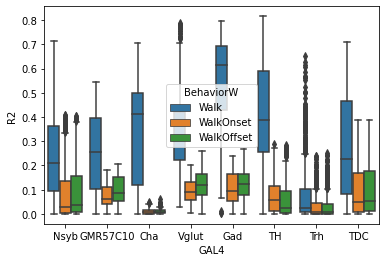

In [5]:
Regiondfonoff=Regionsdf.assign(R2=Regionsdf['R2Walkbin']).assign(BehaviorW='Walk').assign(Coef=Regionsdf['CoefWalkbin'])
Regiondfonoff=pd.concat([Regiondfonoff,Regionsdf.assign(R2=Regionsdf['R2Walkon']).assign(BehaviorW='WalkOnset').assign(Coef=Regionsdf['CoefWalkon'])])
Regiondfonoff=pd.concat([Regiondfonoff,Regionsdf.assign(R2=Regionsdf['R2Walkoff']).assign(BehaviorW='WalkOffset').assign(Coef=Regionsdf['CoefWalkoff'])])
b = sns.boxplot(x='GAL4',y='R2',data=Regiondfonoff,hue='BehaviorW')
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\R2WalkvsOnsetOffset.svg')
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\R2WalkvsOnsetOffsetMaybeFig6.png')

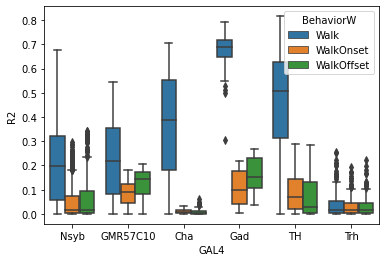

In [6]:
Regiondfonoff30=Regiondfonoff[Regiondfonoff['FR']>20]
b = sns.boxplot(x='GAL4',y='R2',data=Regiondfonoff30,hue='BehaviorW')
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\R2WalkvsOnsetOffset30Hz.svg')
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\R2WalkvsOnsetOffsetMaybeFig6_30Hz.png')

In [7]:
Regionsdf.columns.unique()

Index([                     'index',                            0,
                            'FlyID',               'Templatefile',
                           'TSfile',                      'expID',
                              'UAS',                       'GAL4',
                   'Correspondance',                 'RegionFile',
                    'WalkRegressor',             'GroomRegressor',
                   'FlailRegressor',              'TurnRegressor',
              'ForcedWalkRegressor',        'ForcedTurnRegressor',
                               'FR',             'TSlowlimForced',
                  'TShighlimForced',              'TSlowlimFlail',
                   'TShighlimFlail',               'TSlowlimWalk',
                    'TShighlimWalk',                'eye_painted',
                    'WalkSubstrate',                       'Side',
                      'RegionNames',                  'RegionNum',
                    'CoefTurn_ipsi',                'R2Turn_ip

# Effect of walk substrate

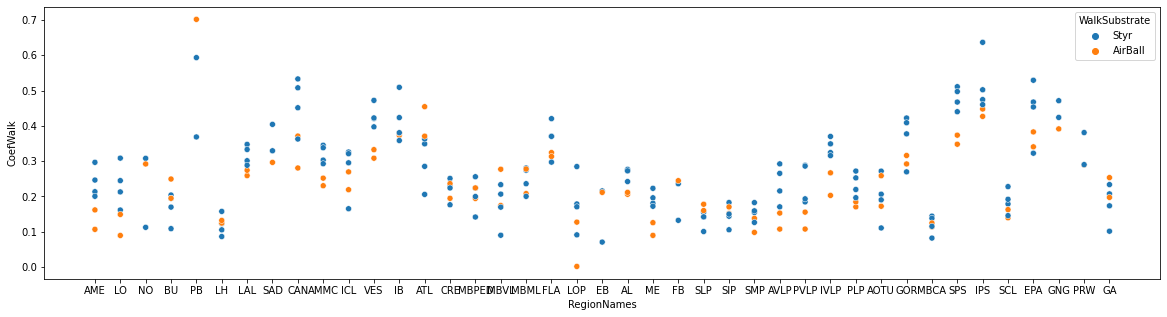

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))
b = sns.scatterplot(x='RegionNames',y='CoefWalk',hue='WalkSubstrate',data=Regionsdf.query('expID=="B35" or expID=="B190" or expID=="B192" or expID=="B34"'))


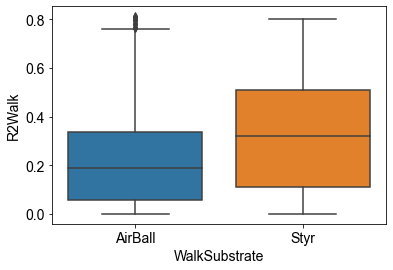

In [9]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 14
b = sns.boxplot(x='WalkSubstrate',y='R2Walk',data=Regionsdf.query('WalkSubstrate=="AirBall" or WalkSubstrate=="Styr"'))
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\EffectSubstrate.svg')

In [10]:
len(Regionsdf.loc[Regionsdf['WalkSubstrate']=='Styr'].query('R2Walk>0').groupby('FlyID').mean()['R2Walk'])

35

In [11]:
len(Regionsdf.loc[Regionsdf['WalkSubstrate']=='AirBall'].query('R2Walk>0').groupby('FlyID').mean()['R2Walk'])

22

In [12]:
print("{0:0.10f}".format(scipy.stats.mannwhitneyu(Regionsdf.loc[Regionsdf['WalkSubstrate']=='Styr'].query('R2Walk>0').groupby('FlyID').mean()['R2Walk'],Regionsdf.loc[Regionsdf['WalkSubstrate']=='AirBall'].query('R2Walk>0').groupby('FlyID').mean()['R2Walk']).pvalue))
print("{0:0.10f}".format(scipy.stats.mannwhitneyu(Regionsdf.loc[Regionsdf['WalkSubstrate']=='Styr'].query('R2Walk>0').groupby('FlyID').mean()['R2Walk'],Regionsdf.loc[Regionsdf['WalkSubstrate']=='AirBall'].query('R2Walk>0').groupby('FlyID').mean()['R2Walk']).statistic))


0.0222144839
525.0000000000


In [13]:
print("{0:0.10f}".format(scipy.stats.mannwhitneyu(Regionsdf.loc[Regionsdf['WalkSubstrate']=='Styr'].groupby('FlyID').mean()['R2Walk'].dropna(),Regionsdf.loc[Regionsdf['WalkSubstrate']=='AirBall'].groupby('FlyID').mean()['R2Walk'].dropna()).pvalue))
print("{0:0.10f}".format(scipy.stats.mannwhitneyu(Regionsdf.loc[Regionsdf['WalkSubstrate']=='Styr'].groupby('FlyID').mean()['R2Walk'].dropna(),Regionsdf.loc[Regionsdf['WalkSubstrate']=='AirBall'].groupby('FlyID').mean()['R2Walk'].dropna()).statistic))


0.0222144839
525.0000000000


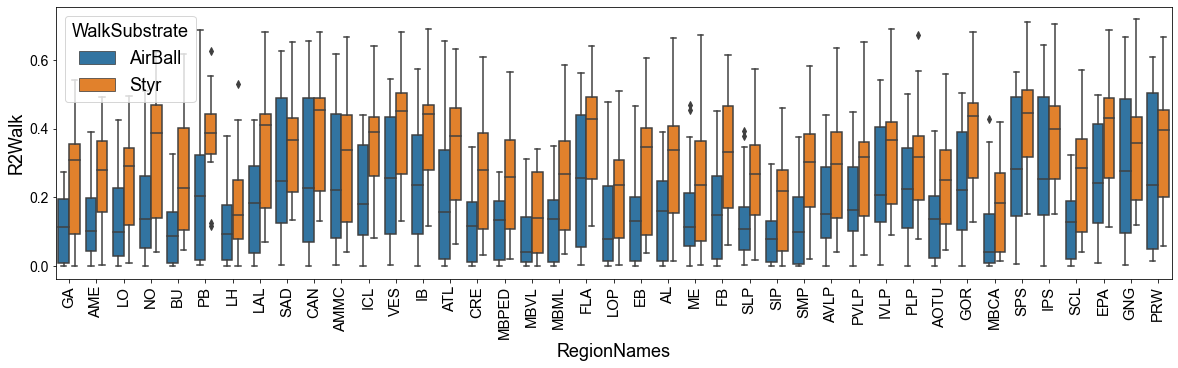

In [22]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 18
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.xlabel('Regions',fontsize=18)
plt.ylabel('R\^2',fontsize=18)
b = sns.boxplot(x='RegionNames',y='R2Walk',hue='WalkSubstrate',data=Regionsdf.query('WalkSubstrate=="AirBall" or WalkSubstrate=="Styr"').query('GAL4=="Nsyb" or GAL4=="GMR57C10"'))
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\EffectSubstrateR2Regions.svg')

In [23]:
 Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')['expID'].unique()

array(['216', '244', '254', '100761', '100762', '103', '104', '105',
       '100106', '100450', 'B34', 'B35', 'B36', 'B37', 'B38', 'B39',
       'B40', 'B41', 'B42', 'B43', 'B44', 'B180', 'B182', 'B183', 'B184',
       'B190', 'B192', 'B193', 'B194', 'B195', 'B196', 'B197', 'B640',
       'B642', 'B643', 'B656', 'B657', 'B658', '100148', '100234',
       '100498', '100609', '981', 'B291', 'B322', 'B323', 'B406_321_',
       '100133', 'B991', 'B992', 'B993', 'B996', 'B998', 'B1037', 'B1039',
       'B1042', 'B1043', 'B1044', 'B1045', 'B1046', 'B1047', 'B1048',
       'B1049', 'B1050', 'B1000', 'B999', 'B675', 'B676', 'B1003',
       'B1004', 'B677', 'B679', 'B1240', 'B1241', 'B1242', 'B1243',
       'B1244', 'B1245', 'B1246', 'B959', 'B960', 'B961', 'B969', 'B902',
       'B903', 'B905', 'KC00060'], dtype=object)

# Effect of frame rate

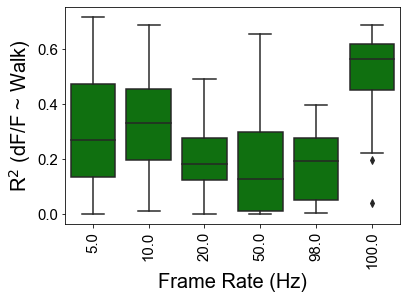

In [24]:
df=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10" and UAS=="6f"')
b = sns.boxplot(x='FR',y='R2Walk',data=df,color='g')
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks([0,0.2,0.4,0.6],fontsize=15)
plt.xlabel('Frame Rate (Hz)',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2WalkwithFrameRate_notsignificant.svg')

In [25]:
df=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10" and UAS=="6f"').groupby(['FlyID']).mean()
resAllmm = smf.ols(formula="R2Walk ~ FR", data=df).fit()
resAllmm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 R2Walk   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.9472
Date:                Fri, 06 May 2022   Prob (F-statistic):              0.353
Time:                        16:40:54   Log-Likelihood:                 9.0472
No. Observations:                  12   AIC:                            -14.09
Df Residuals:                      10   BIC:                            -13.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1956      0.068      2.859      0.017       0.043       0.348
FR             0.0012      0.001      0.973      0.353      -0.002       0.004
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   2.506
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.385
Skew:                           0.092   Prob(JB):                        0.825
Kurtosis:                       2.142   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Check whether convolving was useful

In [26]:
np.nanmean(Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')['R2Walk'])

0.22779610610254974

In [27]:
np.nanmean(Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')['R2Walkbin'])

0.24119904710630133

In [28]:
np.nanmean(Regionsdf['R2Walk'])

0.28455592252011935

In [29]:
np.nanmedian(Regionsdf['R2Walk'])

0.2535163699563392

In [30]:
np.nanmean(Regionsdf['R2Walkbin'])

0.2864041801666471

# Global models

In [31]:
df1=Regionsdf[Regionsdf['R2Walk']>0].query('GAL4=="Nsyb" or GAL4=="GMR57C10"')

dfWGF=df1.assign(R2=df1['R2Walk']).assign(Behavior='Walk').assign(Coef=df1['CoefWalk'])

df2=Regionsdf[Regionsdf['R2Flail']>0].query('GAL4=="Nsyb" or GAL4=="GMR57C10"')

dfWGF=pd.concat([dfWGF,df2.assign(R2=df2['R2Flail']).assign(Behavior='Flail').assign(Coef=df2['CoefFlail'])])

df3=Regionsdf[Regionsdf['R2Groom']>0].query('GAL4=="Nsyb" or GAL4=="GMR57C10"')

dfWGF=pd.concat([dfWGF,df3.assign(R2=df3['R2Groom']).assign(Behavior='Groom').assign(Coef=df3['CoefGroom'])])

In [32]:
df1=Regionsdf[Regionsdf['R2Walk']>0]
dfWGF=df1.assign(R2=df1['R2Walk']).assign(Behavior='Walk').assign(Coef=df1['CoefWalk'])

df2=Regionsdf[Regionsdf['R2Flail']>0]

dfWGF=pd.concat([dfWGF,df2.assign(R2=df2['R2Flail']).assign(Behavior='Flail').assign(Coef=df2['CoefFlail'])])

df3=Regionsdf[Regionsdf['R2Groom']>0]

dfWGF=pd.concat([dfWGF,df3.assign(R2=df3['R2Groom']).assign(Behavior='Groom').assign(Coef=df3['CoefGroom'])])

In [33]:
result = smf.ols(formula="Coef ~ Behavior+RegionNames+GAL4+UAS", data=dfWGF).fit()
aov_table = anova_lm(result, typ=2)
print(result.rsquared)
aov_table

0.36906276986423925


,sum_sq,df,F,PR(>F)
Behavior,20.753860,2.0,468.354804,1.168395e-192
RegionNames,38.138767,40.0,43.034101,5.619195e-301
GAL4,32.076404,7.0,206.820566,2.601930e-282
UAS,1.941838,5.0,17.528676,2.494428e-14
Residual,170.292019,7686.0,NaN,NaN


Effect of UAS significant: keep in the model to correct for it

In [34]:
result = smf.ols(formula="R2 ~ Behavior+RegionNames+GAL4+UAS", data=dfWGF.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')).fit()
aov_table = anova_lm(result, typ=2)
print(result.rsquared)
aov_table

0.26191611061073805


,sum_sq,df,F,PR(>F)
Behavior,12.215185,2.0,266.382487,2.763996e-107
RegionNames,10.372902,40.0,11.310347,1.095199e-65
GAL4,0.002202,1.0,0.096035,7.566625e-01
UAS,2.082957,4.0,22.712028,1.648872e-18
Residual,69.356913,3025.0,NaN,NaN


In [35]:
result = smf.ols(formula="R2Walk ~ RegionNames*WalkSubstrate", data=dfWGF.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')).fit()

aov_table = anova_lm(result, typ=2)
print(result.rsquared)
aov_table

0.2508835918469813


,sum_sq,df,F,PR(>F)
RegionNames,4.652938,40.0,4.773123,2.630747e-07
WalkSubstrate,15.327437,2.0,314.466819,1.238294e-66
RegionNames:WalkSubstrate,1.802818,80.0,0.924692,6.063146e-01
Residual,65.605426,2692.0,NaN,NaN


In [36]:
result = smf.ols(formula="R2 ~ Behavior+RegionNames+GAL4+UAS+WalkSubstrate", data=dfWGF.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')).fit()

aov_table = anova_lm(result, typ=2)
print(result.rsquared)
aov_table

0.32957448455292715


,sum_sq,df,F,PR(>F)
Behavior,14.814544,2.0,352.279079,6.536127e-138
RegionNames,9.784576,40.0,11.633505,8.768418e-68
GAL4,0.065251,1.0,3.103239,7.824034e-02
UAS,2.213476,4.0,26.317419,1.795355e-21
WalkSubstrate,5.435577,2.0,129.254067,1.555344e-54
Residual,61.986759,2948.0,NaN,NaN


In [37]:
from patsy import dmatrices
y, X = dmatrices('R2 ~ Behavior*RegionNames+GAL4+UAS+FR', dfWGF, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,240.0,Intercept
1,46.3,Behavior[T.Groom]
2,47.5,Behavior[T.Walk]
3,11.0,RegionNames[T.AME]
4,10.7,RegionNames[T.AMMC]
...,...,...
131,2.6,Behavior[T.Groom]:RegionNames[T.SPS]
132,10.3,Behavior[T.Walk]:RegionNames[T.SPS]
133,2.6,Behavior[T.Groom]:RegionNames[T.VES]
134,10.3,Behavior[T.Walk]:RegionNames[T.VES]


In [38]:
from patsy import dmatrices
y, X = dmatrices('R2 ~ Behavior*RegionNames', dfWGF, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,193.1,Intercept
1,45.5,Behavior[T.Groom]
2,46.6,Behavior[T.Walk]
3,10.0,RegionNames[T.AME]
4,9.8,RegionNames[T.AMMC]
...,...,...
118,9.4,Behavior[T.Walk]:RegionNames[T.SMP]
119,2.6,Behavior[T.Groom]:RegionNames[T.SPS]
120,9.4,Behavior[T.Walk]:RegionNames[T.SPS]
121,2.6,Behavior[T.Groom]:RegionNames[T.VES]


=> Look at behavior separately:

In [39]:
Regionsdf=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')

In [40]:
from patsy import dmatrices
y, X = dmatrices('R2Walk ~ RegionNames+GAL4+UAS+FR+WalkSubstrate', Regionsdf, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,96.8,Intercept
1,1.9,RegionNames[T.AME]
2,1.9,RegionNames[T.AMMC]
3,1.9,RegionNames[T.AOTU]
4,1.9,RegionNames[T.ATL]
5,1.9,RegionNames[T.AVLP]
6,1.9,RegionNames[T.BU]
7,1.9,RegionNames[T.CAN]
8,1.9,RegionNames[T.CRE]
9,1.5,RegionNames[T.EB]


In [41]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     R2   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     29.58
Date:                Fri, 06 May 2022   Prob (F-statistic):          1.48e-216
Time:                        16:42:46   Log-Likelihood:                 1560.3
No. Observations:                2998   AIC:                            -3021.
Df Residuals:                    2948   BIC:                            -2720.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.1165      0.024      4.804      0.000       0.069       0.164
Behavior[T.Groom]          -0.1574      0.011    -14.280      0.000      -0.179      -0.136
Behavior[T.Walk]            0.0785      0.008      9.273      0.000       0.062       0.095
RegionNames[T.AME]         -0.0395      0.023     -1.712      0.087      -0.085       0.006
RegionNames[T.AMMC]         0.0598      0.023      2.609      0.009       0.015       0.105
RegionNames[T.AOTU]        -0.0336      0.023     -1.467      0.143      -0.079       0.011
RegionNames[T.ATL]          0.0178      0.023      0.777      0.437      -0.027       0.063
RegionNames[T.AVLP]        -0.0067      0.023     -0.293      0.770      -0.052       0.038
RegionNames[T.BU]          -0.0508      0.023     -2.217      0.027      -0.096      -0.006
RegionNames[T.CAN]          0.0789      0.023      3.443      0.001       0.034       0.124
RegionNames[T.CRE]         -0.0412      0.023     -1.795      0.073      -0.086       0.004
RegionNames[T.EB]          -0.0366      0.028     -1.305      0.192      -0.092       0.018
RegionNames[T.EPA]          0.0654      0.023      2.853      0.004       0.020       0.110
RegionNames[T.FB]          -0.0095      0.028     -0.338      0.735      -0.065       0.046
RegionNames[T.FLA]          0.0678      0.023      2.959      0.003       0.023       0.113
RegionNames[T.GA]          -0.0442      0.023     -1.932      0.053      -0.089       0.001
RegionNames[T.GNG]          0.0898      0.028      3.197      0.001       0.035       0.145
RegionNames[T.GOR]          0.0594      0.023      2.590      0.010       0.014       0.104
RegionNames[T.IB]           0.0707      0.023      3.085      0.002       0.026       0.116
RegionNames[T.ICL]          0.0254      0.023      1.107      0.269      -0.020       0.070
RegionNames[T.IPS]          0.0918      0.023      4.003      0.000       0.047       0.137
RegionNames[T.IVLP]         0.0574      0.023      2.502      0.012       0.012       0.102
RegionNames[T.LAL]          0.0196      0.023      0.855      0.392      -0.025       0.065
RegionNames[T.LH]          -0.0643      0.023     -2.805      0.005      -0.109      -0.019
RegionNames[T.LO]          -0.0381      0.023     -1.663      0.096      -0.083       0.007
RegionNames[T.LOP]         -0.0523      0.023     -2.281      0.023      -0.097      -0.007
RegionNames[T.MBCA]        -0.0880      0.023     -3.838      0.000      -0.133      -0.043
RegionNames[T.MBML]        -0.0421      0.023     -1.835      0.067      -0.087       0.003
RegionNames[T.MBPED]       -0.0453      0.023     -1.978      0.048      -0.090      -0.000
RegionNames[T.MBVL]        -0.1022      0.023     -4.457      0.000      -0.147      -0.057
RegionNames[T.ME]          -0.0283      0.023  

Omnibus is high: let's try to log

In [42]:
Regionsdf['logR2Walk']=np.log(1+Regionsdf['R2Walk'])

In [43]:
result = smf.ols(formula="logR2Walk ~ RegionNames+GAL4+UAS+FR", data=Regionsdf).fit()

In [44]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS              Adj. R-squared:     0.161     
Dependent Variable:  logR2Walk        AIC:                -2575.3847
Date:                2022-05-06 16:42 BIC:                -2309.8715
No. Observations:    2099             Log-Likelihood:     1334.7    
Df Model:            46               F-statistic:        9.727     
Df Residuals:        2052             Prob (F-statistic): 1.03e-59  
R-squared:           0.179            Scale:              0.016790  
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept             0.2014   0.0269  7.4842 0.0000  0.1486  0.2542
RegionNames[T.AME]   -0.0283   0.0246 -1.1495 0.2505 -0.0765  0.0200
RegionNames[T.AMMC]   0.0459   0.0245  1.8751 0.0609 -0.0021  0.0939
RegionNames[T.AOTU]  -0.0266   0.0245 -1.0844 0.2783 -0.0746  0.0215
RegionNames[T.ATL]    0.0282   0.0245  1.1508 0.2499 -0.0198  0.0762
RegionNames[T.AVLP]   0.0029   0.0245  0.1173 0.9066 -0.0451  0.0509
RegionNames[T.BU]    -0.0445   0.0245 -1.8190 0.0691 -0.0926  0.0035
RegionNames[T.CAN]    0.0760   0.0245  3.1044 0.0019  0.0280  0.1240
RegionNames[T.CRE]   -0.0328   0.0245 -1.3388 0.1808 -0.0808  0.0152
RegionNames[T.EB]    -0.0241   0.0300 -0.8050 0.4209 -0.0830  0.0347
RegionNames[T.EPA]    0.0739   0.0245  3.0172 0.0026  0.0259  0.1219
RegionNames[T.FB]     0.0023   0.0300  0.0783 0.9376 -0.0565  0.0612
RegionNames[T.FLA]    0.0679   0.0245  2.7741 0.0056  0.0199  0.1160
RegionNames[T.GA]    -0.0391   0.0244 -1.6031 0.1091 -0.0869  0.0087
RegionNames[T.GNG]    0.0735   0.0300  2.4504 0.0144  0.0147  0.1323
RegionNames[T.GOR]    0.0664   0.0245  2.7129 0.0067  0.0184  0.1145
RegionNames[T.IB]     0.0736   0.0245  3.0076 0.0027  0.0256  0.1217
RegionNames[T.ICL]    0.0369   0.0245  1.5060 0.1322 -0.0111  0.0849
RegionNames[T.IPS]    0.0853   0.0245  3.4846 0.0005  0.0373  0.1334
RegionNames[T.IVLP]   0.0556   0.0245  2.2708 0.0233  0.0076  0.1036
RegionNames[T.LAL]    0.0262   0.0245  1.0706 0.2845 -0.0218  0.0742
RegionNames[T.LH]    -0.0617   0.0245 -2.5197 0.0118 -0.1097 -0.0137
RegionNames[T.LO]    -0.0265   0.0245 -1.0837 0.2786 -0.0746  0.0215
RegionNames[T.LOP]   -0.0450   0.0245 -1.8395 0.0660 -0.0931  0.0030
RegionNames[T.MBCA]  -0.0741   0.0245 -3.0248 0.0025 -0.1221 -0.0260
RegionNames[T.MBML]  -0.0333   0.0245 -1.3601 0.1739 -0.0813  0.0147
RegionNames[T.MBPED] -0.0380   0.0245 -1.5535 0.1205 -0.0861  0.0100
RegionNames[T.MBVL]  -0.0898   0.0245 -3.6679 0.0003 -0.1378 -0.0418
RegionNames[T.ME]    -0.0220   0.0246 -0.8949 0.3710 -0.0703  0.0262
RegionNames[T.NO]     0.0099   0.0300  0.3307 0.7409 -0.0489  0.0687
RegionNames[T.PB]     0.0403   0.0300  1.3427 0.1795 -0.0185  0.0991
RegionNames[T.PLP]    0.0284   0.0245  1.1606 0.2459 -0.0196  0.0764
RegionNames[T.PRW]    0.0591   0.0300  1.9706 0.0489  0.0003  0.1179
RegionNames[T.PVLP]   0.0038   0.0245  0.1569 0.8753 -0.0442  0.0519
RegionNames[T.SAD]    0.0763   0.0300  2.5449 0.0110  0.0175  0.1351
RegionNames[T.SCL]   -0.0260   0.0245 -1.0615 0.2886 -0.0740  0.0220
RegionNames[T.SIP]   -0.0785   0.0245 -3.2050 0.0014 -0.1265 -0.0305
RegionNames[T.SLP]   -0.0321   0.0245 -1.3114 0.1899 -0.0801  0.0159
RegionNames[T.SMP]   -0.0260   0.0245 -1.0637 0.2876 -0.0741  0.0220
RegionNames[T.SPS]    0.1040   0.0245  4.2476 0.0000  0.0560  0.1520
RegionNames[T.VES]    0.0812   0.0245  3.3143 0.0009  0.0331  0.1292
GAL4[T.Nsyb]          0.0637   0.0136  4.6741 0.0000  0.0370  0.0904
UAS[T.6m]            -0.0662   0.0115 -5.7754 0.0000 -0.0887 -0.0437
UAS[T.6s]            -0.0079   0.0178 -0.4452 0.6562 -0.0428  0.0269
UAS[T.7f]            -0.0444   0.0177 -2.5089 0.0122 -0.0792 -0.0097
UAS[T.7s]             0.0450   0.0161

Worse now: we keep not logged

In [45]:
Regionsdf.loc[Regionsdf['GAL4']=="Nsyb",'GAL4']='ANsyb'

In [46]:
Regionsdf.loc[Regionsdf['UAS']=="6f",'GAL4']='Z6f'

In [47]:
Regionsdf=Regionsdf.query('GAL4=="ANsyb" or GAL4=="GMR57C10"')

# Get region coefficients

In [48]:
lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS+GAL4+WalkSubstrate", data=Regionsdf).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 R2Walk   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     15.53
Date:                Fri, 06 May 2022   Prob (F-statistic):           7.76e-98
Time:                        16:42:47   Log-Likelihood:                 952.93
No. Observations:                1874   AIC:                            -1814.
Df Residuals:                    1828   BIC:                            -1559.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.1695      0.021      8.052      0.000       0.128       0.211
RegionNames[T.AME]           -0.0356      0.030     -1.203      0.229      -0.094       0.022
RegionNames[T.AMMC]           0.0707      0.029      2.401      0.016       0.013       0.129
RegionNames[T.AOTU]          -0.0310      0.029     -1.053      0.293      -0.089       0.027
RegionNames[T.ATL]            0.0445      0.029      1.512      0.131      -0.013       0.102
RegionNames[T.AVLP]           0.0037      0.029      0.125      0.900      -0.054       0.061
RegionNames[T.BU]            -0.0540      0.029     -1.831      0.067      -0.112       0.004
RegionNames[T.CAN]            0.1193      0.029      4.049      0.000       0.062       0.177
RegionNames[T.CRE]           -0.0376      0.029     -1.276      0.202      -0.095       0.020
RegionNames[T.EB]            -0.0298      0.036     -0.826      0.409      -0.101       0.041
RegionNames[T.EPA]            0.0946      0.029      3.209      0.001       0.037       0.152
RegionNames[T.FB]             0.0075      0.036      0.208      0.836      -0.063       0.078
RegionNames[T.FLA]            0.0979      0.029      3.321      0.001       0.040       0.156
RegionNames[T.GA]            -0.0467      0.029     -1.594      0.111      -0.104       0.011
RegionNames[T.GNG]            0.1110      0.036      3.075      0.002       0.040       0.182
RegionNames[T.GOR]            0.0855      0.029      2.902      0.004       0.028       0.143
RegionNames[T.IB]             0.0987      0.029      3.348      0.001       0.041       0.156
RegionNames[T.ICL]            0.0502      0.029      1.704      0.089      -0.008       0.108
RegionNames[T.IPS]            0.1248      0.029      4.235      0.000       0.067       0.183
RegionNames[T.IVLP]           0.0737      0.029      2.502      0.012       0.016       0.132
RegionNames[T.LAL]            0.0312      0.029      1.057      0.291      -0.027       0.089
RegionNames[T.LH]            -0.0668      0.029     -2.266      0.024      -0.125      -0.009
RegionNames[T.LO]            -0.0379      0.029     -1.287      0.198      -0.096       0.020
RegionNames[T.LOP]           -0.0636      0.029     -2.157      0.031      -0.121      -0.006
RegionNames[T.MBCA]          -0.0766      0.029     -2.601      0.009      -0.134      -0.019
RegionNames[T.MBML]          -0.0368      0.029     -1.250      0.211      -0.095       0.021
RegionNames[T.MBPED]         -0.0442      0.029     -1.499      0.134      -0.102       0.014
RegionNames[T.MBVL]          -0.1004      0.029     -3.406      0.001      -0.158      -0.043
RegionNames[T.ME]            -0.0377      0.030     -1.274      0.203      -0.096       0.020
RegionNames[T.NO]             0.0129      0.036      0.359      0.720      

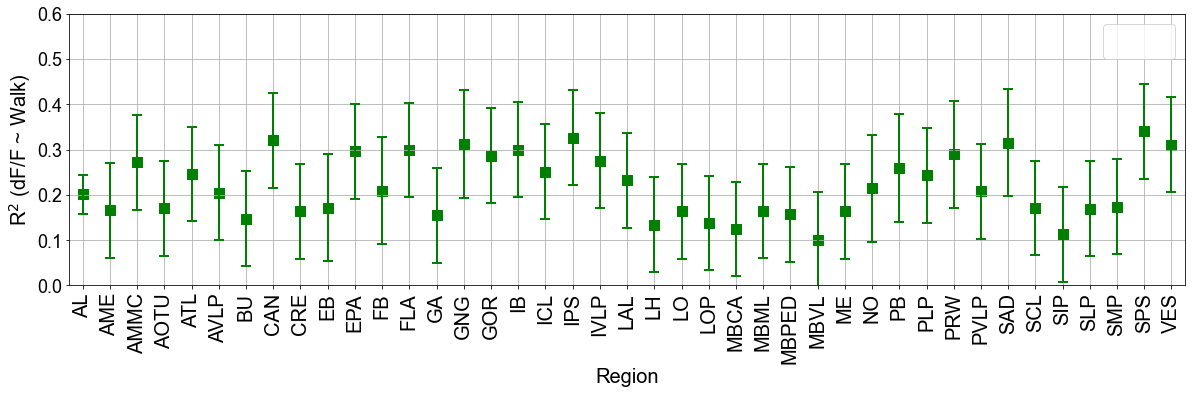

In [49]:
lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS+GAL4", data=Regionsdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(df3['RegionNames'].unique()), 
                       rotation=90, fontsize=20)

plt.ylim([0,0.6])
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2WalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

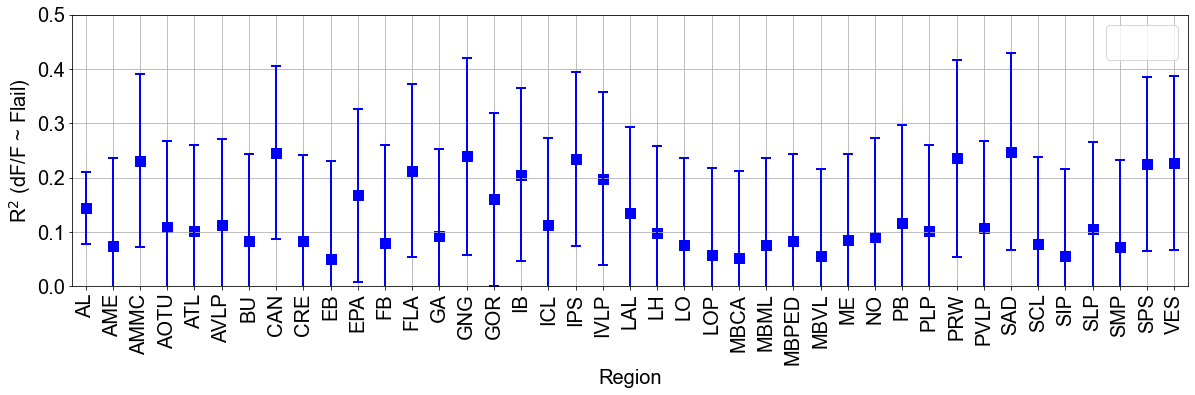

In [50]:
lin_reg = smf.ols(formula="R2Flail ~ RegionNames+UAS+GAL4", data=Regionsdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='b', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Flail)',fontsize=20)
plt.ylim([0,0.5])
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='b',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(df3['RegionNames'].unique()), 
                       rotation=90, fontsize=20)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2FlailwithRegionReg.svg')


In [51]:
lin_reg = smf.ols(formula="R2Groom ~ RegionNames+UAS+GAL4", data=Regionsdf).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                R2Groom   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     24.25
Date:                Fri, 06 May 2022   Prob (F-statistic):           1.87e-78
Time:                        16:42:51   Log-Likelihood:                 524.64
No. Observations:                 375   AIC:                            -961.3
Df Residuals:                     331   BIC:                            -788.5
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0207      0.021      1.010      0.313      -0.020       0.061
RegionNames[T.AME]      -0.0104      0.028     -0.368      0.713      -0.066       0.045
RegionNames[T.AMMC]      0.0758      0.028      2.666      0.008       0.020       0.132
RegionNames[T.AOTU]     -0.0218      0.028     -0.767      0.444      -0.078       0.034
RegionNames[T.ATL]      -0.0353      0.028     -1.243      0.215      -0.091       0.021
RegionNames[T.AVLP]     -0.0151      0.028     -0.532      0.595      -0.071       0.041
RegionNames[T.BU]       -0.0388      0.028     -1.366      0.173      -0.095       0.017
RegionNames[T.CAN]      -0.0281      0.028     -0.989      0.324      -0.084       0.028
RegionNames[T.CRE]      -0.0344      0.028     -1.210      0.227      -0.090       0.022
RegionNames[T.EB]       -0.0205      0.035     -0.588      0.557      -0.089       0.048
RegionNames[T.EPA]      -0.0217      0.028     -0.763      0.446      -0.078       0.034
RegionNames[T.FB]       -0.0353      0.035     -1.014      0.311      -0.104       0.033
RegionNames[T.FLA]      -0.0080      0.028     -0.282      0.778      -0.064       0.048
RegionNames[T.GA]       -0.0160      0.028     -0.564      0.573      -0.072       0.040
RegionNames[T.GNG]       0.0942      0.035      2.704      0.007       0.026       0.163
RegionNames[T.GOR]      -0.0233      0.028     -0.821      0.412      -0.079       0.033
RegionNames[T.IB]       -0.0363      0.028     -1.276      0.203      -0.092       0.020
RegionNames[T.ICL]      -0.0188      0.028     -0.661      0.509      -0.075       0.037
RegionNames[T.IPS]       0.0338      0.028      1.189      0.235      -0.022       0.090
RegionNames[T.IVLP]      0.0407      0.028      1.431      0.153      -0.015       0.097
RegionNames[T.LAL]      -0.0228      0.028     -0.803      0.423      -0.079       0.033
RegionNames[T.LH]       -0.0133      0.028     -0.466      0.641      -0.069       0.043
RegionNames[T.LO]       -0.0173      0.028     -0.608      0.543      -0.073       0.039
RegionNames[T.LOP]       0.0048      0.028      0.170      0.865      -0.051       0.061
RegionNames[T.MBCA]     -0.0658      0.028     -2.313      0.021      -0.122      -0.010
RegionNames[T.MBML]     -0.0226      0.028     -0.795      0.427      -0.079       0.033
RegionNames[T.MBPED]    -0.0133      0.028     -0.467      0.641      -0.069       0.043
RegionNames[T.MBVL]     -0.0743      0.028     -2.612      0.009      -0.130      -0.018
RegionNames[T.ME]       -0.0105      0.028     -0.369      0.712      -0.066       0.045
RegionNames[T.NO]       -0.0206      0.035     -0.592      0.554      -0.089       0.048
RegionNames[T.PB]       -0.0312      0.035     -0.897      0.370      -0.100       0.037
RegionNames[T.PLP]      -0.0145      0.028     -0.511    

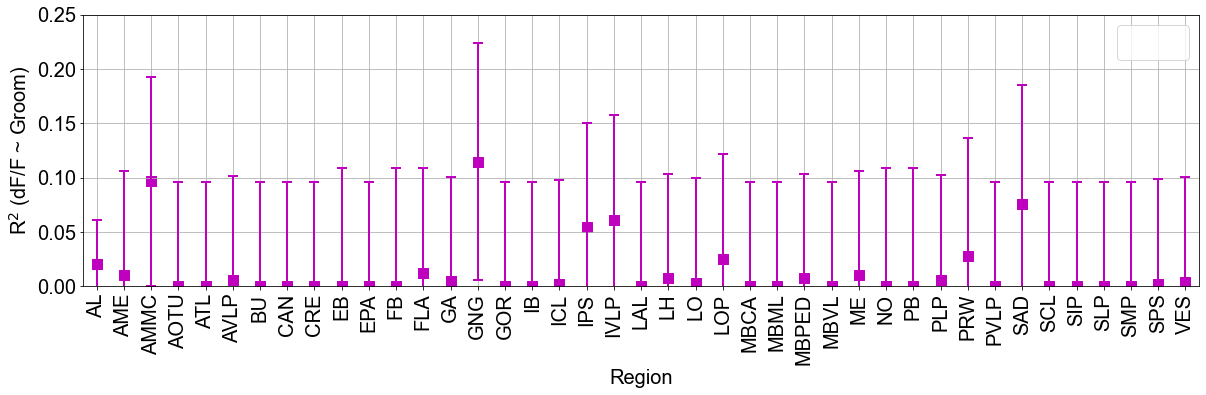

In [52]:
lin_reg = smf.ols(formula="R2Groom ~ RegionNames+UAS+GAL4", data=Regionsdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='m', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Groom)',fontsize=20)
plt.ylim([0,0.25])
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='m',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(df3['RegionNames'].unique()), 
                       rotation=90, fontsize=20)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2GroomwithRegionReg.svg')


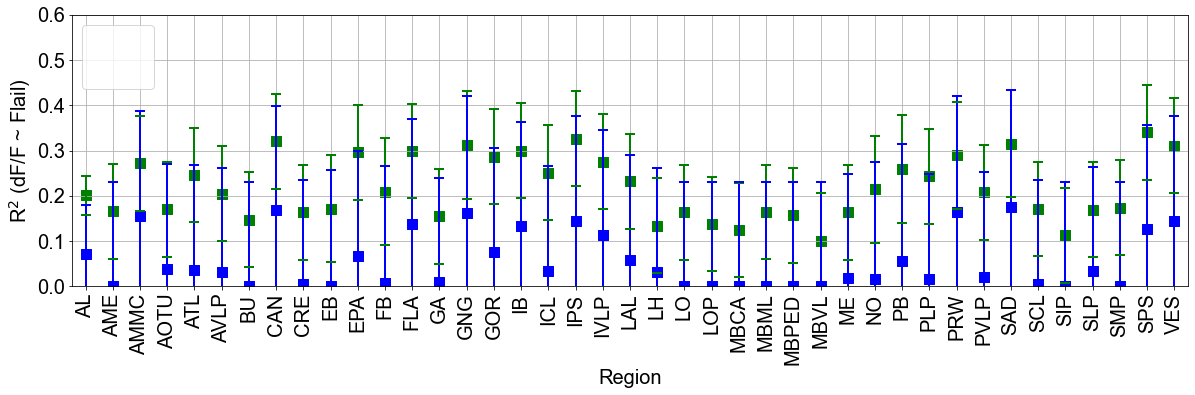

In [53]:
lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS+GAL4", data=Regionsdf).fit()

fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
#----------------------------

lin_reg = smf.ols(formula="R2Flail ~ RegionNames+UAS+GAL4+FR", data=Regionsdf).fit()

err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='b', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Flail)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='b',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(df3['RegionNames'].unique()), 
                       rotation=90, fontsize=20)
plt.ylim([0,0.6])
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2Flail_WalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

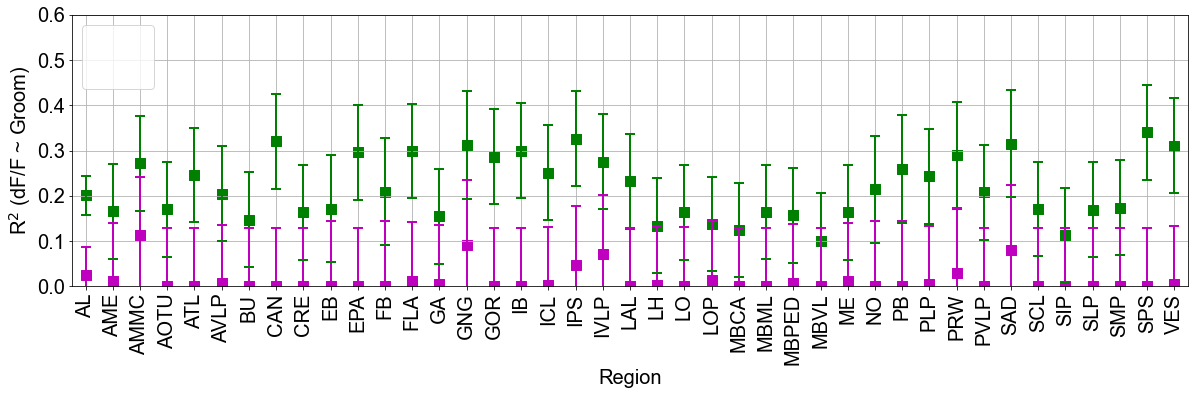

In [54]:
lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS+GAL4", data=Regionsdf).fit()

fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")

#----------------------------

lin_reg = smf.ols(formula="R2Groom ~ RegionNames+UAS+GAL4+FR", data=Regionsdf).fit()

err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='m', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Groom)',fontsize=20)
plt.ylim([0,0.6])
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='m',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(df3['RegionNames'].unique()), 
                       rotation=90, fontsize=20)

plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2Groom_WalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

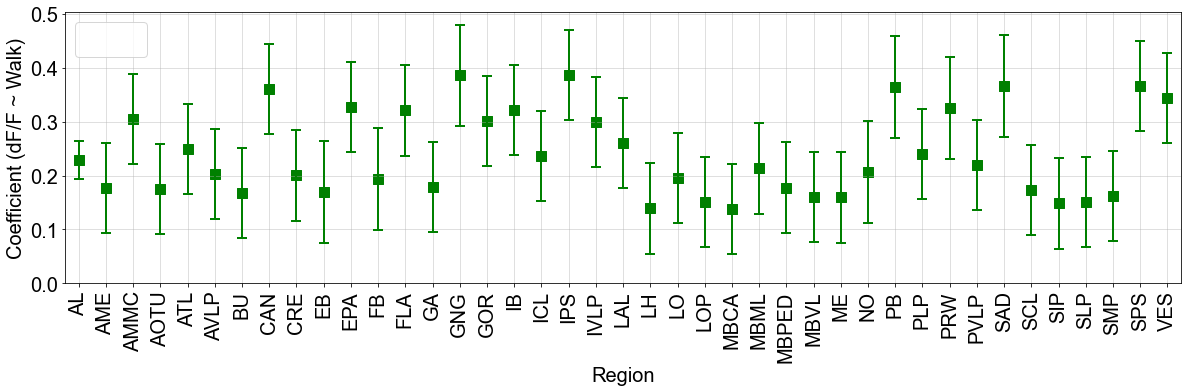

In [55]:
lin_reg = smf.ols(formula="CoefWalk ~ RegionNames+UAS+GAL4+FR", data=Regionsdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(df3['RegionNames'].unique()), 
                       rotation=90, fontsize=20)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.grid(True,alpha=0.5)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\CoefWalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

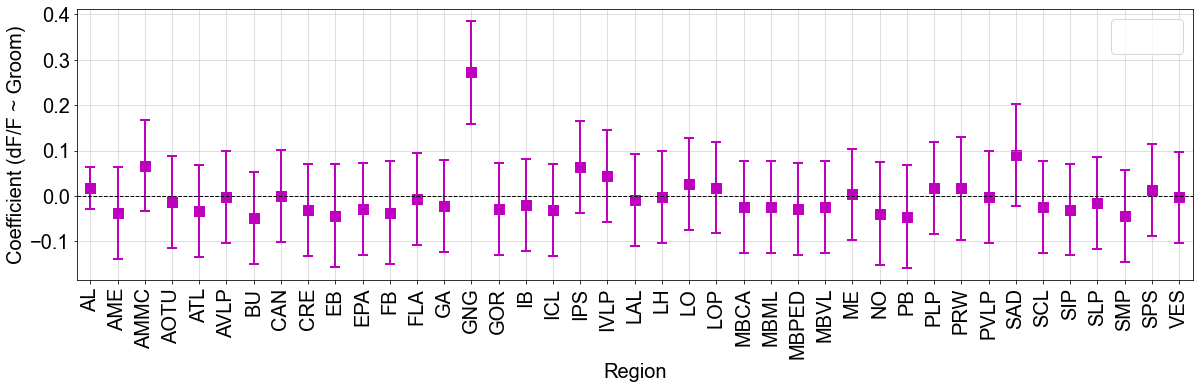

In [56]:
lin_reg = smf.ols(formula="CoefGroom ~ RegionNames+UAS+GAL4+FR", data=Regionsdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='m', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ Groom)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='m',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(df3['RegionNames'].unique()), 
                       rotation=90, fontsize=20)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.grid(True,alpha=0.5)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\CoefGroomwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

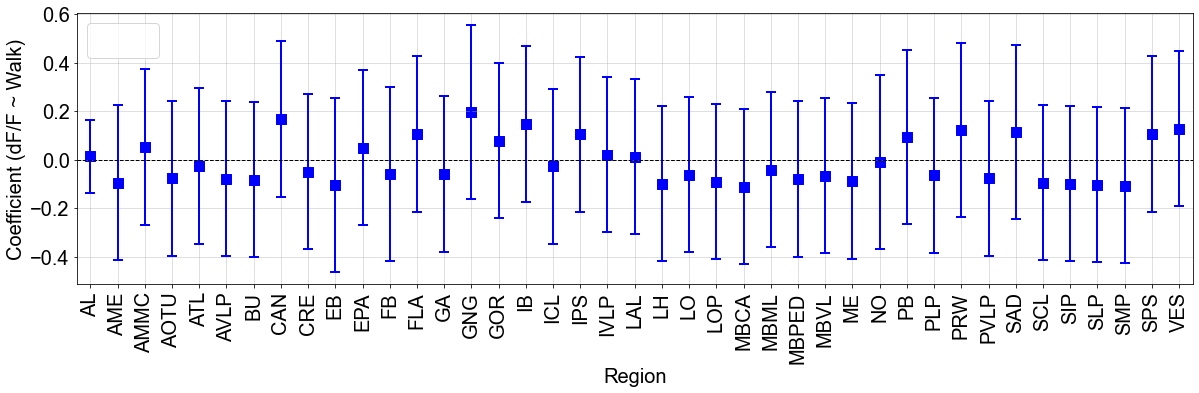

In [57]:
lin_reg = smf.ols(formula="CoefFlail ~ RegionNames+UAS+GAL4+FR", data=Regionsdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='b', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='b',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(df3['RegionNames'].unique()), 
                       rotation=90, fontsize=20)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.grid(True,alpha=0.5)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\CoefFlailwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

# Get Rsquared values list for maps

In [58]:
Regionsdf[Regionsdf['R2Walk']>0].expID.unique()

array(['216', '100761', '103', '104', '100106', 'B34', 'B35', 'B36',
       'B37', 'B41', 'B42', 'B43', 'B180', 'B182', 'B183', 'B192', 'B193',
       'B194', 'B195', 'B196', '981', '100133', 'B993', 'B1037', 'B1047'],
      dtype=object)

In [59]:
df=Regionsdf[Regionsdf['R2Walk']>0]
df2=df[['R2Walk','RegionNum','RegionNames']]
df2=df2.dropna()
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2WalkPAN.txt'
df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2WalkPAN.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Walk'])))        
        f.write('\n')
        
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

/media/NAS/Sophie/WalkProject/Figures/Figure1/MedianR2WalkPAN.txt


In [60]:
Regionsdf[Regionsdf['R2Flail']>0].expID.unique()

array(['B42', 'B183', 'B190', 'B192', 'B1037', 'B675', 'KC00060'],
      dtype=object)

In [61]:
df=Regionsdf[Regionsdf['R2Flail']>0]
df2=df[['R2Flail','RegionNum','RegionNames']]
df2=df2.dropna()
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2FlailPAN.txt'
df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2FlailPAN.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Flail'])))        
        f.write('\n')
        #print((str(np.median(df2['R2Flail']))))
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    #print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

In [62]:
Regionsdf[Regionsdf['R2Groom']>0].expID.unique()

array(['244', '100761', 'B42', 'B192', '100133'], dtype=object)

In [63]:
df=Regionsdf[Regionsdf['R2Groom']>0]

with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2AllGroomPAN.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.nanmedian(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Groom'])))        
        f.write('\n')
       # print((str(np.nanmedian(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Groom']))))
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
   # print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

# Global comparison Rsquare

In [64]:
np.nanmedian(Regionsdf['R2Walk'])

0.19339887854822962

In [65]:
df3=dfWGF.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
np.nanmedian(df3.loc[df3['Behavior']=='Walk','R2'])

0.1940851869103093

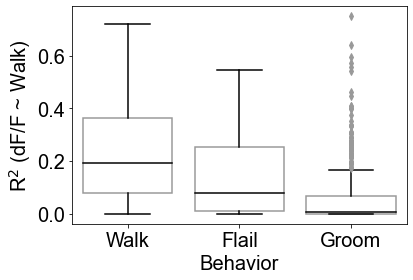

In [66]:
df3=dfWGF.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
ax=sns.boxplot(x='Behavior',y='R2',data=df3,color='w')
for j in range(18):
     ax.lines[j].set_color('black')
        
plt.ylabel('R$^2$ (dF/F ~ Walk)')
# for i,violin in enumerate(ax.artists):
#     violin.set_edgecolor('black')
#     box.set_facecolor('white')
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\BoxR2RegionsAllBehaviorp.svg')


In [87]:
df3.loc[df3['Behavior']=='Walk']['expID'].unique()

array(['216', '100761', '103', '104', '100106', 'B34', 'B35', 'B36',
       'B37', 'B41', 'B42', 'B43', 'B180', 'B182', 'B183', 'B192', 'B193',
       'B194', 'B195', 'B196', '100148', '100234', '100609', '981',
       '100133', 'B993', 'B1037', 'B1047'], dtype=object)

In [88]:
df3.loc[df3['Behavior']=='Flail']['expID'].unique()

array(['B42', 'B183', 'B190', 'B192', 'B1037', 'B675', 'KC00060'],
      dtype=object)

In [89]:
df3.loc[df3['Behavior']=='Groom']['expID'].unique()

array(['244', '100761', 'B42', 'B192', '100148', '100133'], dtype=object)

In [67]:
dfWalkR2=df3.loc[df3['Behavior']=='Walk'].groupby('FlyID').mean()
dfFlailR2=df3.loc[df3['Behavior']=='Flail'].groupby('FlyID').mean()
dfGroomR2=df3.loc[df3['Behavior']=='Groom'].groupby('FlyID').mean()

In [85]:
dfWalkR2

,index,FR,TSlowlimForced,TShighlimForced,TSlowlimFlail,TShighlimFlail,TSlowlimWalk,TShighlimWalk,RegionNum,CoefTurn_ipsi,...,R2Walkoff,CoefWalkoff,CoefForcedWalk,R2ForcedWalk,R2Groom,CoefGroom,R2Flail,CoefFlail,R2,Coef
FlyID,,,,,,,,,,,,,,,,,,,,,
1,0.000000,50.000000,NaN,NaN,NaN,NaN,0.0,4999.0,37.486842,NaN,...,0.020138,-0.036293,NaN,NaN,NaN,NaN,NaN,NaN,0.219122,0.096088
4,15.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,...,0.155180,0.089009,NaN,NaN,0.261293,0.086932,NaN,NaN,0.296680,0.147127
6,42.483221,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,36.852349,NaN,...,0.001079,0.294598,NaN,NaN,NaN,NaN,NaN,NaN,0.113839,0.054285
7,55.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,...,0.173244,1.246135,NaN,NaN,NaN,NaN,NaN,NaN,0.395494,0.313778
9,72.500000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,...,0.210425,-0.242572,NaN,NaN,NaN,NaN,NaN,NaN,0.208650,0.275152
10,105.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,...,0.022523,0.650162,NaN,NaN,0.002109,0.011401,0.104424,0.077244,0.220396,0.148084
11,125.000000,23.333333,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,...,0.027476,0.406408,NaN,NaN,NaN,NaN,0.335136,0.454960,0.238507,0.127369
13,155.000000,42.000000,NaN,NaN,2500.0,4996.0,1.0,2000.0,37.000000,NaN,...,0.096052,0.896924,NaN,NaN,0.004024,0.026971,0.140254,0.048675,0.207901,0.177741
15,205.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,...,0.008839,-0.564913,NaN,NaN,0.080703,-0.057621,NaN,NaN,0.528378,0.318798


In [84]:
len(dfWalkR2.loc[dfWalkR2['R2']>0]),len(dfFlailR2.loc[dfFlailR2['R2']>0]),len(dfGroomR2.loc[dfGroomR2['R2']>0])

(16, 7, 6)

In [80]:
scipy.stats.mannwhitneyu(dfWalkR2.loc[dfWalkR2['R2']>0]['R2'], dfFlailR2.loc[dfFlailR2['R2']>0]['R2'])

MannwhitneyuResult(statistic=85.0, pvalue=0.05544202286697912)

In [82]:
scipy.stats.mannwhitneyu(dfWalkR2.loc[dfWalkR2['R2']>0]['R2'], dfGroomR2.loc[dfGroomR2['R2']>0]['R2'])

MannwhitneyuResult(statistic=85.0, pvalue=0.0045300416817444684)

In [83]:
scipy.stats.mannwhitneyu(dfFlailR2.loc[dfFlailR2['R2']>0]['R2'], dfGroomR2.loc[dfGroomR2['R2']>0]['R2'])

MannwhitneyuResult(statistic=31.0, pvalue=0.18065268065268064)

In [68]:
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\BehaviorPairR2_pvaluesperfly.txt', 'w') as f:

        print('Walk vs Flail')
        
        f.write("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfWalkR2.loc[dfWalkR2['R2']>0]['R2'], dfFlailR2.loc[dfFlailR2['R2']>0]['R2']).pvalue*3))        
        f.write('\n')
        print("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfWalkR2.loc[dfWalkR2['R2']>0]['R2'], dfFlailR2.loc[dfFlailR2['R2']>0]['R2']).pvalue*3))

        print('Walk vs Groom')
        
        f.write("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfWalkR2.loc[dfWalkR2['R2']>0]['R2'],dfGroomR2.loc[dfGroomR2['R2']>0]['R2']).pvalue*3))        
        f.write('\n')
        print("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfWalkR2.loc[dfWalkR2['R2']>0]['R2'], dfGroomR2.loc[dfGroomR2['R2']>0]['R2']).pvalue*3))

        print('Flail vs Groom')
        
        f.write("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfFlailR2.loc[dfFlailR2['R2']>0]['R2'],dfGroomR2.loc[dfGroomR2['R2']>0]['R2']).pvalue*3))        
        f.write('\n')
        print("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfFlailR2.loc[dfFlailR2['R2']>0]['R2'],dfGroomR2.loc[dfGroomR2['R2']>0]['R2']).pvalue*3))



Walk vs Flail
0.1663260686
Walk vs Groom
0.0135901250
Flail vs Groom
0.5419580420


In [42]:
df3.loc[df3['Behavior']=='Groom']['FlyID'].unique()

array([ 2,  4, 10, 13, 15, 24], dtype=int64)

In [43]:
df3.loc[df3['Behavior']=='Flail']['FlyID'].unique()

array([10, 11, 12, 13, 26, 28, 38], dtype=int64)

In [44]:
df3.loc[df3['Behavior']=='Walk']['FlyID'].unique()

array([ 1,  4,  6,  7,  9, 10, 11, 13, 15, 16, 18, 20, 24, 25, 26, 27],
      dtype=int64)

# Axon vs cytoplasm

In [45]:
Regionsdf=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Regionsdf.pkl")

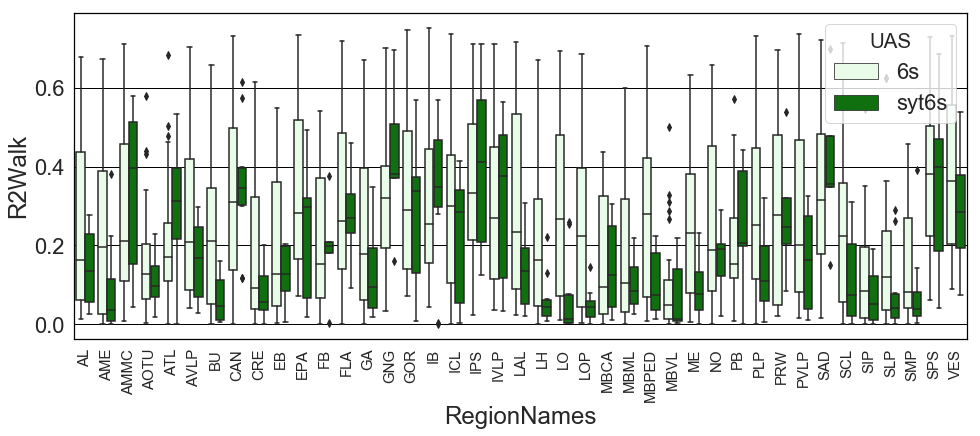

In [46]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))

df2=Regionsdf
df3=df2.query('GAL4!="Trh" or GAL4!="TDC" or GAL4!="TH" or GAL4!="Cha" or GAL4!="Gad" or GAL4!="Vglut"')
df4=df3.query('UAS=="syt6s" or UAS=="6s"')
#df2=Regionsdf.loc[Regionsdf['GAL4']=='Nsyb']

b = sns.boxplot(x='RegionNames',y='R2Walk', hue='UAS',data=df4,color='g',order=sorted(df3['RegionNames'].unique()))

   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2RegionsAllWalk_sytg_notsyt.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

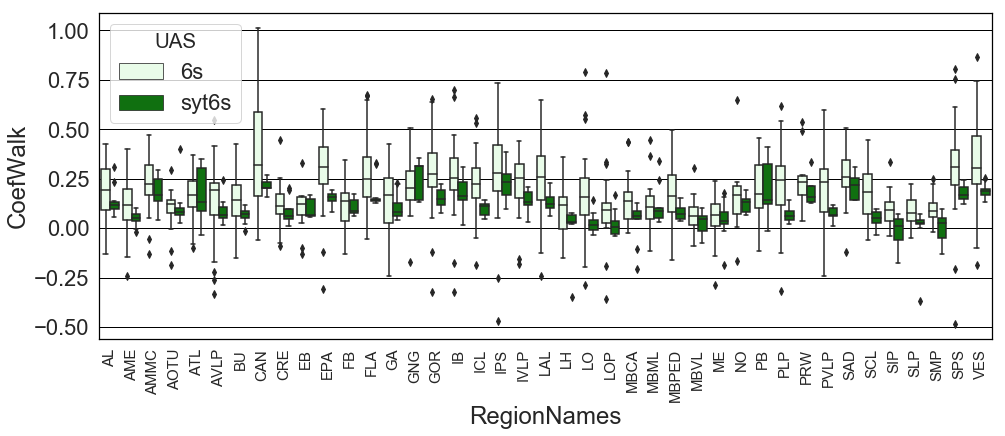

In [47]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))

df2=Regionsdf
df3=df2.query('GAL4!="Trh" or GAL4!="TDC" or GAL4!="TH" or GAL4!="Cha" or GAL4!="Gad" or GAL4!="Vglut"')
df4=df3.query('UAS=="syt6s" or UAS=="6s"')
#df2=Regionsdf.loc[Regionsdf['GAL4']=='Nsyb']

b = sns.boxplot(x='RegionNames',y='CoefWalk', hue='UAS',data=df4,color='g',order=sorted(df3['RegionNames'].unique()))



plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\CoefRegionsAllWalk_sytg_notsyt.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [48]:
df=Regionsdf.query('UAS=="syt6s"')
df2=df[['R2Walk','RegionNum','RegionNames']]
df2=df2.dropna()

df=df2
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2SytWalk.txt'
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2SytWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Walk'])))        
        f.write('\n')
        #print((str(np.median(df2['R2Walk']))))
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    #print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

In [49]:
df=Regionsdf.query('UAS=="6s"')
df2=df[['R2Walk','RegionNum','RegionNames']]
df2=df2.dropna()

df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2_6sWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Walk'])))        
        f.write('\n')
        
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

/media/NAS/Sophie/WalkProject/Figures/Figure1/MedianR2SytWalk.txt


In [50]:
df=Regionsdf.query('UAS=="6s" or UAS=="syt6s"')
result = smf.ols(formula="R2Walk ~ UAS", data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 R2Walk   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     37.71
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.07e-09
Time:                        21:36:00   Log-Likelihood:                 267.27
No. Observations:                1382   AIC:                            -530.5
Df Residuals:                    1380   BIC:                            -520.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2571      0.006     40.946      0.000       0.245       0.269
UAS[T.syt6s]    -0.0743      0.012     -6.141      0.000      -0.098      -0.051
==============================================================================
Omnibus:                      128.495   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.573
Skew:                           0.666   Prob(JB):                     2.42e-27
Kurtosis:                       2.406   Cond. No.                         2.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Eye covered versus not

In [51]:
result = smf.ols(formula="R2Walk ~ UAS+GAL4+FR+RegionNames+eye_painted", data=Regionsdf).fit()

In [52]:
aov_table = anova_lm(result, typ=2)
print(result.rsquared)
aov_table

0.30184966217950004


,sum_sq,df,F,PR(>F)
UAS,9.010537,5.0,82.006881,7.142009e-64
GAL4,16.129131,7.0,104.853407,9.766496e-44
RegionNames,8.668703,40.0,9.861971,5.346230e-53
eye_painted,0.003864,1.0,0.175848,6.750170e-01
FR,3.803599,1.0,173.086969,9.100005e-38
Residual,38.478359,1751.0,NaN,NaN


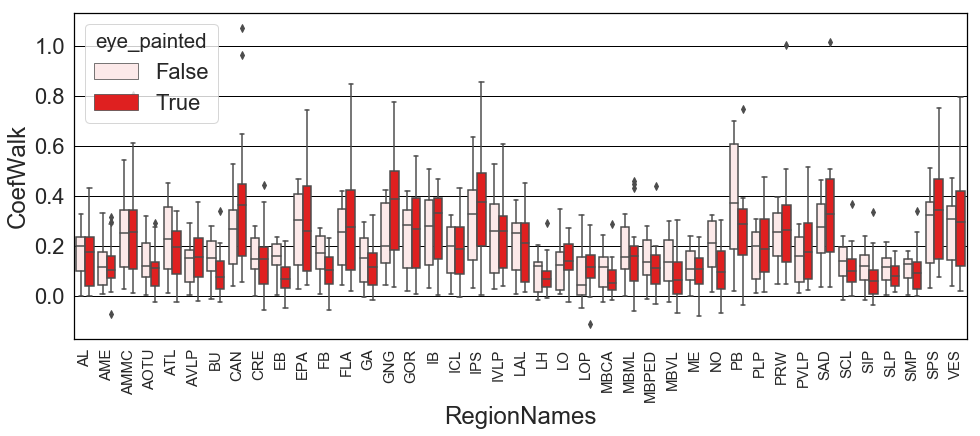

In [53]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))

df3=Regionsdf
#df3=df2.dropna()
df3=df3.query('eye_painted==True or eye_painted==False')
df3=df3.loc[df3['UAS']!='7f']
df3=df3.loc[df3['UAS']!='6f']
df3=df3.loc[df3['FR']!=100]


b = sns.boxplot(x='RegionNames',y='CoefWalk',hue='eye_painted',order=sorted(df3['RegionNames'].unique()),data=df3,color='r')


plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\CoefRegionsEyeCoveredG_notcoveredMWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

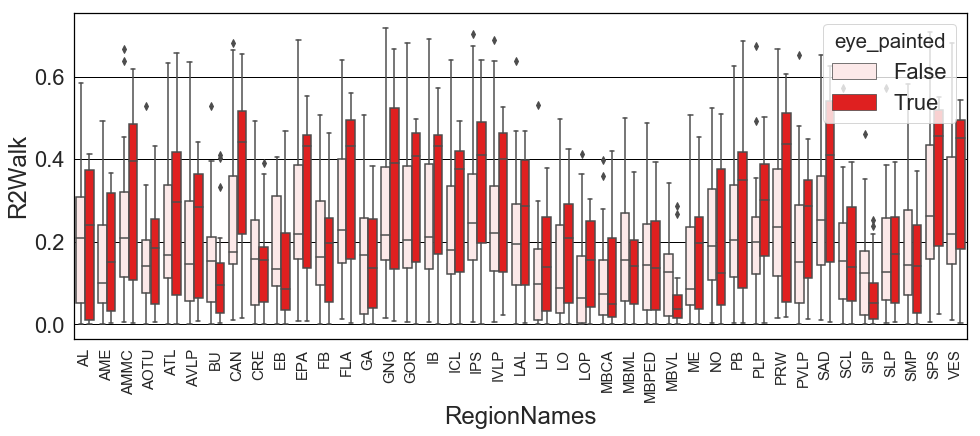

In [54]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))

df3=Regionsdf
#df3=df2.dropna()
df3=df3.query('eye_painted==True or eye_painted==False')

df3=df3.loc[df3['UAS']!='7f']
df3=df3.loc[df3['UAS']!='6f']
df3=df3.loc[df3['FR']!=100]

b = sns.boxplot(x='RegionNames',y='R2Walk',hue='eye_painted',order=sorted(df3['RegionNames'].unique()),data=df3,color='r')


plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2RegionsEyeCoveredG_notcoveredMWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [55]:
print('not eye covered')
print(df3[df3['eye_painted']==False]['FlyID'].unique())
print(df3[df3['eye_painted']==False]['UAS'].unique())
print(df3[df3['eye_painted']==False]['GAL4'].unique())
print('eye covered')
print(df3[df3['eye_painted']==True]['FlyID'].unique())
print(df3[df3['eye_painted']==True]['UAS'].unique())
print(df3[df3['eye_painted']==False]['GAL4'].unique())

not eye covered
[ 6  9 10 20 24]
['6m' '6s']
['Nsyb' 'GMR57C10']
eye covered
[11 13 25 26 27]
['6m' '7s' '6s']
['Nsyb' 'GMR57C10']


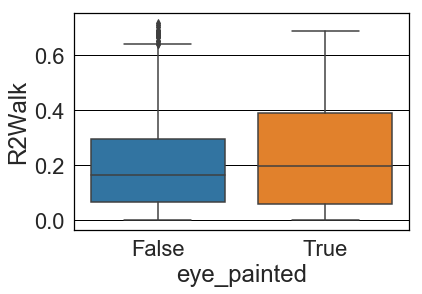

In [56]:
df3=Regionsdf
df3=df3.loc[df3['UAS']!='7f']
df3=df3.loc[df3['UAS']!='6f']
df3=df3.loc[df3['FR']!=100]
b = sns.boxplot(x='eye_painted',y='R2Walk',data=df3)
#b = sns.scatterplot(x='eye_painted',y='R2Walk',data=Regionsdf)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\BoxAllFliesR2WalkPaintedvsNot.svg')


In [90]:
print("{0:0.10f}".format(scipy.stats.mannwhitneyu(df3.loc[df3['eye_painted']==False].groupby('FlyID').mean()['R2Walk'],df3.loc[df3['eye_painted']==True].groupby('FlyID').mean()['R2Walk']).pvalue))
print("{0:0.10f}".format(scipy.stats.mannwhitneyu(df3.loc[df3['eye_painted']==False].groupby('FlyID').mean()['R2Walk'],df3.loc[df3['eye_painted']==True].groupby('FlyID').mean()['R2Walk']).statistic))


0.5303030303
13.0000000000


In [58]:
result = smf.ols(formula="R2Walk ~ eye_painted+UAS+GAL4-1", data=Regionsdf).fit()
aov_table = anova_lm(result, typ=2)
print(result.rsquared)
aov_table

0.0716741271889132


,sum_sq,df,F,PR(>F)
eye_painted,11.325734,2.0,196.765916,2.868142e-78
UAS,5.093397,5.0,35.395747,1.550233e-28
GAL4,8.645580,7.0,42.915049,5.997183e-19
Residual,53.731726,1867.0,NaN,NaN


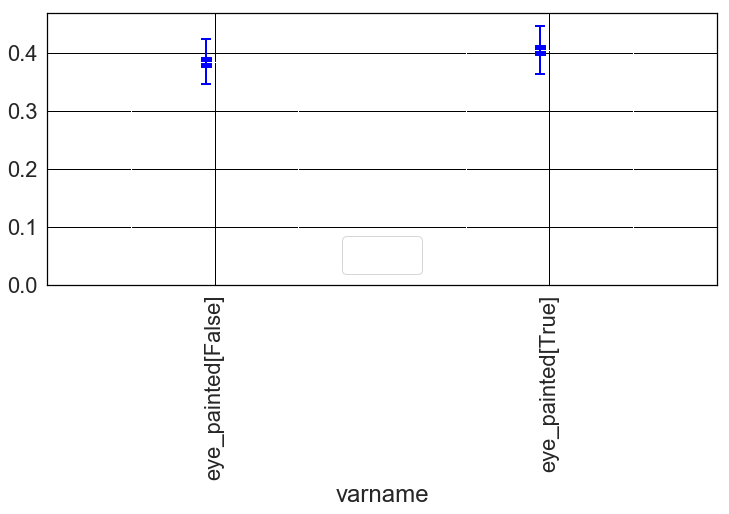

In [59]:

fig, ax = plt.subplots(figsize=(12, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

###################3

err_series = result.params - result.conf_int(alpha=0.05)[0]
coef_df = pd.DataFrame({'coef': result.params[0:2],
                       'err': err_series.values[0:2],
                       'varname': err_series.index.values[0:2]
                      })


coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='blue', lw=2, capsize=5, capthick=2,transform=trans+offset(-9)),
            label='')

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(-9), 
          y=coef_df['coef'], color='blue',label="Model for fly ID")

In [60]:
df3=Regionsdf.loc[Regionsdf['eye_painted']==False]
df3=df3.loc[df3['UAS']!='7f']
df3=df3.loc[df3['UAS']!='6f']
df3=df3.loc[df3['FR']!=100]

file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2_not_eye_paintedWalk.txt'
df=df3
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2_not_eye_paintedWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.nanmedian(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Walk'])))        
        f.write('\n')
       # print((str(np.nanmedian(df2['R2Walk']))))
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
   # print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

In [61]:
df3=Regionsdf.loc[Regionsdf['eye_painted']==True]
df3=df3.loc[df3['UAS']!='7f']
df3=df3.loc[df3['UAS']!='6f']
df3=df3.loc[df3['FR']!=100]
df=df3
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2_eye_paintedWalk.txt'
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2_eye_paintedWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.nanmedian(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Walk'])))        
        f.write('\n')
        
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))                     

/media/NAS/Sophie/WalkProject/Figures/Figure1/MedianR2_eye_paintedWalk.txt
